## **Capstone** **Project:** **BBC** **News** **Text** **Classification** **Using** **Multiple** **Text** **Embedding** **Techniques**


**Context**

The BBC Text dataset contains news articles labeled into one of five categories: business, entertainment, politics, sport, and tech. This dataset is widely used for natural language processing (NLP) tasks involving text classification, topic modeling, and information retrieval. Understanding and classifying news content is essential for media monitoring, recommendation systems, and automated content organization.

## **Problem Statement**
The goal of this project is to build an accurate machine learning model that can classify BBC news articles into their respective categories. This involves steps such as text preprocessing, vectorization using multiple embedding techniques, selecting suitable machine learning or deep learning models, and evaluating classification performance.


## **Objectives**
- Build a text classification model using the BBC news dataset.  
- Apply different text representation techniques.  
- Compare the performance of these techniques for accurate news category prediction.  
- Enhance understanding of how various text embeddings affect classification results.

# **Installing the Necessary Libraries**

In [1]:
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 87.5 MB/s eta 0:00:00


In [2]:
!pip install sentence-transformers

In [3]:
# Importing Necessary Libraries

# Data handling
import pandas as pd
import numpy as np

# to read and manipulate the data
import pandas as pd
import numpy as np
pd.set_option('max_colwidth', None)

# to visualise data
import matplotlib.pyplot as plt
import seaborn as sns

# to use regular expressions for manipulating text data
import re

# to load the natural language toolkit
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# to remove common stop words
from nltk.corpus import stopwords

# to perform lemmatization
from nltk.stem import WordNetLemmatizer

# to create Bag of Words and TF-IDF features
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# to import Word2Vec
from gensim.models import Word2Vec

# to import BERT embeddings
from sentence_transformers import SentenceTransformer

# to split data into train and test sets
from sklearn.model_selection import train_test_split

# to build Logistic Regression model
from sklearn.linear_model import LogisticRegression

# to compute evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


#**Uploading the Dataset**

In [4]:
from google.colab import files
uploaded = files.upload()


Saving bbc-text.csv to bbc-text.csv


In [5]:
df = pd.read_csv('bbc-text.csv', encoding='latin-1')

df = df[['category', 'text']]
df.columns = ['label', 'text']

df.head()

label  \
0           tech   
1       business   
2          sport   
3          sport   
4  entertainment   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

## **Data Overview**

In [6]:
df.shape

(2225, 2)

In [7]:
df.isnull().sum()


,0
label,0
text,0


In [8]:
df.duplicated().sum()

np.int64(99)

In [9]:
df = df.drop_duplicates()
df.shape


(2126, 2)

In [10]:
df['label'].value_counts()


,count
label,
sport,504
business,503
politics,403
entertainment,369
tech,347


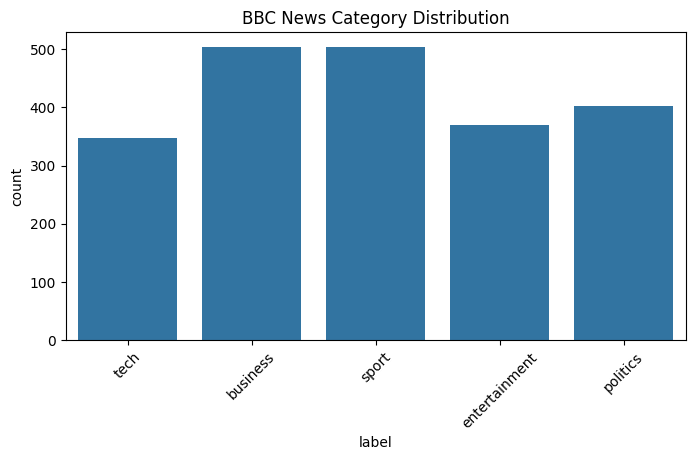

In [11]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x="label")
plt.title("BBC News Category Distribution")
plt.xticks(rotation=45)
plt.show()

## **Text Preprocessing**

In [12]:
# Basic text cleaning
df['text'] = df['text'].astype(str)

# converting text to lowercase
df['text'] = df['text'].str.lower()

# removing special characters
df['text'] = df['text'].str.replace(r'[^\w\s]', '', regex=True)

# removing extra whitespace
df['text'] = df['text'].str.replace(r'\s+', ' ', regex=True).str.strip()

df.head()

label  \
0           tech   
1       business   
2          sport   
3          sport   
4  entertainment   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [13]:
# stopword removal & lemmatization
nltk.download('punkt_tab')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
def preprocess_text(text):
    tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

df['text'] = df['text'].apply(preprocess_text)
df.head()

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,label,text
0,tech,tv future hand viewer home theatre system plasma highdefinition tv digital video recorder moving living room way people watch tv radically different five year time according expert panel gathered annual consumer electronics show la vega discus new technology impact one favourite pastime u leading trend programme content delivered viewer via home network cable satellite telecom company broadband service provider front room portable device one talkedabout technology ce digital personal video recorder dvr pvr settop box like u tivo uk sky system allow people record store play pause forward wind tv programme want essentially technology allows much personalised tv also builtin highdefinition tv set big business japan u slower take europe lack highdefinition programming people forward wind advert also forget abiding network channel schedule putting together alacarte entertainment u network cable satellite company worried mean term advertising revenue well brand identity viewer loyalty channel although u lead technology moment also concern raised europe particularly growing uptake service like sky happens today see nine month year time uk adam hume bbc broadcast futurologist told bbc news website like bbc issue lost advertising revenue yet pressing issue moment commercial uk broadcaster brand loyalty important everyone talking content brand rather network brand said tim hanlon brand communication firm starcom mediavest reality broadband connection anybody producer content added challenge hard promote programme much choice mean said stacey jolna senior vice president tv guide tv group way people find content want watch simplified tv viewer mean network u term channel could take leaf google book search engine future instead scheduler help people find want watch kind channel model might work younger ipod generation used taking control gadget play might suit everyone panel recognised older generation comfortable familiar schedule channel brand know getting perhaps want much choice put hand mr hanlon suggested end kid diaper pushing button already everything possible available said mr hanlon ultimately consumer tell market want 50 000 new gadget technology showcased ce many enhancing tvwatching experience highdefinition tv set everywhere many new model lcd liquid crystal display tv launched dvr capability built instead external box one example launched show humax 26inch lcd tv 80hour tivo dvr dvd recorder one u biggest satellite tv company directtv even launched branded dvr show 100hours recording capability instant replay search function set pause rewind tv 90 hour microsoft chief bill gate announced preshow keynote speech partnership tivo called tivotogo mean people play recorded programme window pc mobile device reflect increasing trend freeing multimedia people watch want want
1,business,worldcom bos left book alone former worldcom bos bernie ebbers accused overseeing 11bn â58bn fraud never made accounting decision witness told juror david myers made comment questioning defence lawyer arguing mr ebbers responsible worldcom problem phone company collapsed 2002 prosecutor claim loss hidden protect firm share mr myers already pleaded guilty fraud assisting prosecutor monday defence lawyer reid weingarten tried distance client allegation cross examination asked mr myers ever knew mr ebbers make accounting decision aware mr myers replied ever know mr ebbers make accounting entry worldcom book mr weingarten pressed replied witness mr myers admitted ordered false accounting entry request former worldcom chief financial officer scott sullivan defence lawyer trying paint mr sullivan admitted fraud testify later trial mastermind behind worldcom accounting house card mr ebbers team meanwhile looking portray affable bos admission pe graduate economist whatever ability mr ebbers transformed worldcom relative unknown 160bn telecom giant investor darling late 1990s worldcom problem mounted however competition increased telecom boo

In [14]:
# separating the features (text messages) and the target labels (spam/ham)
X = df['text']
y = df['label']
# splitting the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## **Defining the Evaluation Function for Model Performance**

In [20]:
def evaluate_and_plot(model, X_test, y_test, title):
      y_pred = model.predict(X_test)

      print("Accuracy:", accuracy_score(y_test, y_pred))
      print("Precision:", precision_score(y_test, y_pred, average='weighted'))
      print("Recall:", recall_score(y_test, y_pred, average='weighted'))
      print("F1-score:", f1_score(y_test, y_pred, average='weighted'))

      cm = confusion_matrix(y_test, y_pred)
      plt.figure(figsize=(4,3))
      sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
      plt.title(f"Confusion Matrix - {title}")
      plt.show()

      return y_pred

## **Bag-of-Words (BoW): Feature Extraction and Model Evaluation**

In [16]:
bow_vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')

X_train_bow = bow_vectorizer.fit_transform(X_train.apply(lambda x: " ".join(x)))
X_test_bow = bow_vectorizer.transform(X_test.apply(lambda x: " ".join(x)))


=== BoW ===


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.6549295774647887
Precision: 0.6594492423349897
Recall: 0.6549295774647887
F1-score: 0.6552492345905082


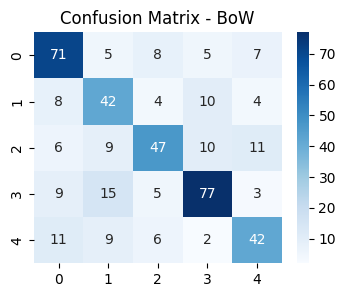

In [21]:
print("=== BoW ===")
lr_bow = LogisticRegression(class_weight='balanced', max_iter=2000)
lr_bow.fit(X_train_bow, y_train)

y_pred_bow = evaluate_and_plot(lr_bow, X_test_bow, y_test, "BoW")

## **N-grams (1,2): Feature Extraction and Model Evaluation**

In [22]:
ngram_vectorizer = CountVectorizer(ngram_range=(1,2), token_pattern=r'\b\w+\b')

X_train_ngram = ngram_vectorizer.fit_transform(X_train.apply(lambda x: " ".join(x)))
X_test_ngram = ngram_vectorizer.transform(X_test.apply(lambda x: " ".join(x)))

=== N-grams ===
Accuracy: 0.8990610328638498
Precision: 0.9004001463624339
Recall: 0.8990610328638498
F1-score: 0.8991739624676537


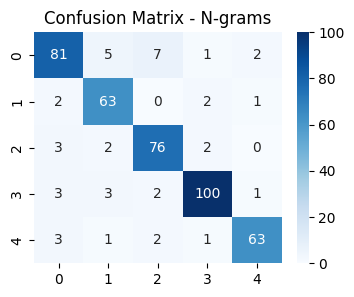

In [23]:
print("=== N-grams ===")
lr_ngram = LogisticRegression(class_weight='balanced', max_iter=2000)
lr_ngram.fit(X_train_ngram, y_train)

y_pred_ngram = evaluate_and_plot(lr_ngram, X_test_ngram, y_test, "N-grams")


## **TF-IDF: Feature Extraction and Model Evaluation**

In [24]:
tfidf_vectorizer = TfidfVectorizer(token_pattern=r'\b\w+\b')

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train.apply(lambda x: " ".join(x)))
X_test_tfidf = tfidf_vectorizer.transform(X_test.apply(lambda x: " ".join(x)))


=== TF-IDF ===
Accuracy: 0.5633802816901409
Precision: 0.5642051201337149
Recall: 0.5633802816901409
F1-score: 0.5600835311866926


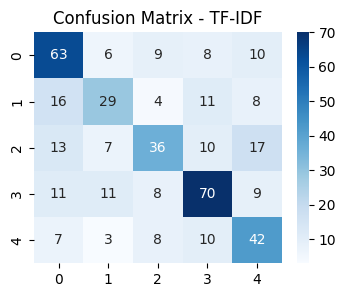

In [25]:
print("=== TF-IDF ===")
lr_tfidf = LogisticRegression(class_weight='balanced', max_iter=2000)
lr_tfidf.fit(X_train_tfidf, y_train)

y_pred_tfidf = evaluate_and_plot(lr_tfidf, X_test_tfidf, y_test, "TF-IDF")


## **Word2Vec: Feature Extraction and Model Evaluation**

In [26]:
w2v_model = Word2Vec(sentences=X_train, vector_size=100, window=5, min_count=1, workers=4)

def get_w2v_vector(tokens):
    vecs = [w2v_model.wv[word] for word in tokens if word in w2v_model.wv]
    if len(vecs) == 0:
      return np.zeros(100)
    return np.mean(vecs, axis=0)

X_train_w2v = np.array([get_w2v_vector(tokens) for tokens in X_train])
X_test_w2v = np.array([get_w2v_vector(tokens) for tokens in X_test])


=== Word2Vec ===
Accuracy: 0.49061032863849763
Precision: 0.4984708521031724
Recall: 0.49061032863849763
F1-score: 0.4844171640488336


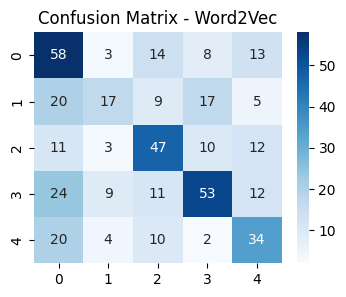

In [27]:
print("=== Word2Vec ===")
lr_w2v = LogisticRegression(class_weight='balanced', max_iter=2000)
lr_w2v.fit(X_train_w2v, y_train)

y_pred_w2v = evaluate_and_plot(lr_w2v, X_test_w2v, y_test, "Word2Vec")


## **GloVe: Feature Extraction and Model Evaluation**

In [28]:
!wget -nc http://nlp.stanford.edu/data/glove.6B.zip
!unzip -n glove.6B.zip

# Load GloVe embeddings
glove_vectors = {}
with open("glove.6B.100d.txt", encoding="utf8") as f:
    for line in f:
      values = line.split()
      word = values[0]
      vector = np.asarray(values[1:], dtype='float32')
      glove_vectors[word] = vector

--2025-11-16 05:19:33--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-11-16 05:19:33--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-11-16 05:19:34--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [29]:
def get_glove_vector(tokens):
      vecs = [glove_vectors[word] for word in tokens if word in glove_vectors]
      if len(vecs) == 0:
        return np.zeros(100)
      return np.mean(vecs, axis=0)
X_train_glove = np.array([get_glove_vector(tokens) for tokens in X_train])
X_test_glove = np.array([get_glove_vector(tokens) for tokens in X_test])

=== GloVe ===
Accuracy: 0.5117370892018779
Precision: 0.5197766290793431
Recall: 0.5117370892018779
F1-score: 0.5119823631279943


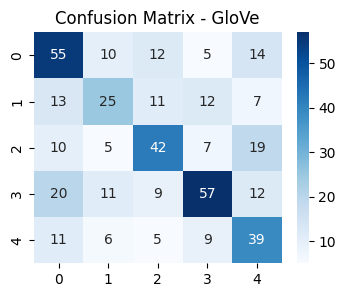

In [30]:
print("=== GloVe ===")
lr_glove = LogisticRegression(class_weight='balanced', max_iter=2000)
lr_glove.fit(X_train_glove, y_train)

y_pred_glove = evaluate_and_plot(lr_glove, X_test_glove, y_test, "GloVe")


## **BERT: Feature Extraction and Model Evaluation**

In [31]:
bert_model = SentenceTransformer('bert-base-nli-mean-tokens')

X_train_sentences = X_train.apply(lambda x: " ".join(x))
X_test_sentences = X_test.apply(lambda x: " ".join(x))

X_train_bert = bert_model.encode(X_train_sentences.tolist(), show_progress_bar=True)
X_test_bert = bert_model.encode(X_test_sentences.tolist(), show_progress_bar=True)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/399 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/54 [00:00<?, ?it/s]

Batches:   0%|          | 0/14 [00:00<?, ?it/s]

=== BERT ===
Accuracy: 0.5164319248826291
Precision: 0.5230354210525561
Recall: 0.5164319248826291
F1-score: 0.5171837455631433


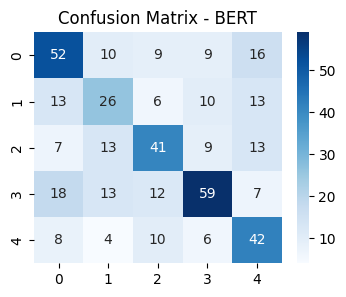

In [32]:
print("=== BERT ===")
lr_bert = LogisticRegression(class_weight='balanced', max_iter=2000)
lr_bert.fit(X_train_bert, y_train)

y_pred_bert = evaluate_and_plot(lr_bert, X_test_bert, y_test, "BERT")


## **Comparison of All Embedding Techniques Using All Metrics**

In [33]:
comparison = pd.DataFrame({
      "Embedding": ["BoW", "N-grams", "TF-IDF", "Word2Vec", "GloVe", "BERT"],

          "Accuracy": [
            accuracy_score(y_test, y_pred_bow),
            accuracy_score(y_test, y_pred_ngram),
            accuracy_score(y_test, y_pred_tfidf),
            accuracy_score(y_test, y_pred_w2v),
            accuracy_score(y_test, y_pred_glove),
            accuracy_score(y_test, y_pred_bert)
          ],

          "Precision": [
            precision_score(y_test, y_pred_bow, average='weighted'),
            precision_score(y_test, y_pred_ngram, average='weighted'),
            precision_score(y_test, y_pred_tfidf, average='weighted'),
            precision_score(y_test, y_pred_w2v, average='weighted'),
            precision_score(y_test, y_pred_glove, average='weighted'),
            precision_score(y_test, y_pred_bert, average='weighted')
          ],
          "Recall": [
            recall_score(y_test, y_pred_bow, average='weighted'),
            recall_score(y_test, y_pred_ngram, average='weighted'),
            recall_score(y_test, y_pred_tfidf, average='weighted'),
            recall_score(y_test, y_pred_w2v, average='weighted'),
            recall_score(y_test, y_pred_glove, average='weighted'),
            recall_score(y_test, y_pred_bert, average='weighted')
          ],

          "F1-score": [
            f1_score(y_test, y_pred_bow, average='weighted'),
            f1_score(y_test, y_pred_ngram, average='weighted'),
            f1_score(y_test, y_pred_tfidf, average='weighted'),
            f1_score(y_test, y_pred_w2v, average='weighted'),
            f1_score(y_test, y_pred_glove, average='weighted'),
            f1_score(y_test, y_pred_bert, average='weighted')
          ]


})
comparison

,Embedding,Accuracy,Precision,Recall,F1-score
0,BoW,0.654930,0.659449,0.654930,0.655249
1,N-grams,0.899061,0.900400,0.899061,0.899174
2,TF-IDF,0.563380,0.564205,0.563380,0.560084
3,Word2Vec,0.490610,0.498471,0.490610,0.484417
4,GloVe,0.511737,0.519777,0.511737,0.511982
5,BERT,0.516432,0.523035,0.516432,0.517184


## **Visualizing Accuracy, Precision, Recall, and F1-score for All Embedding Techniques**

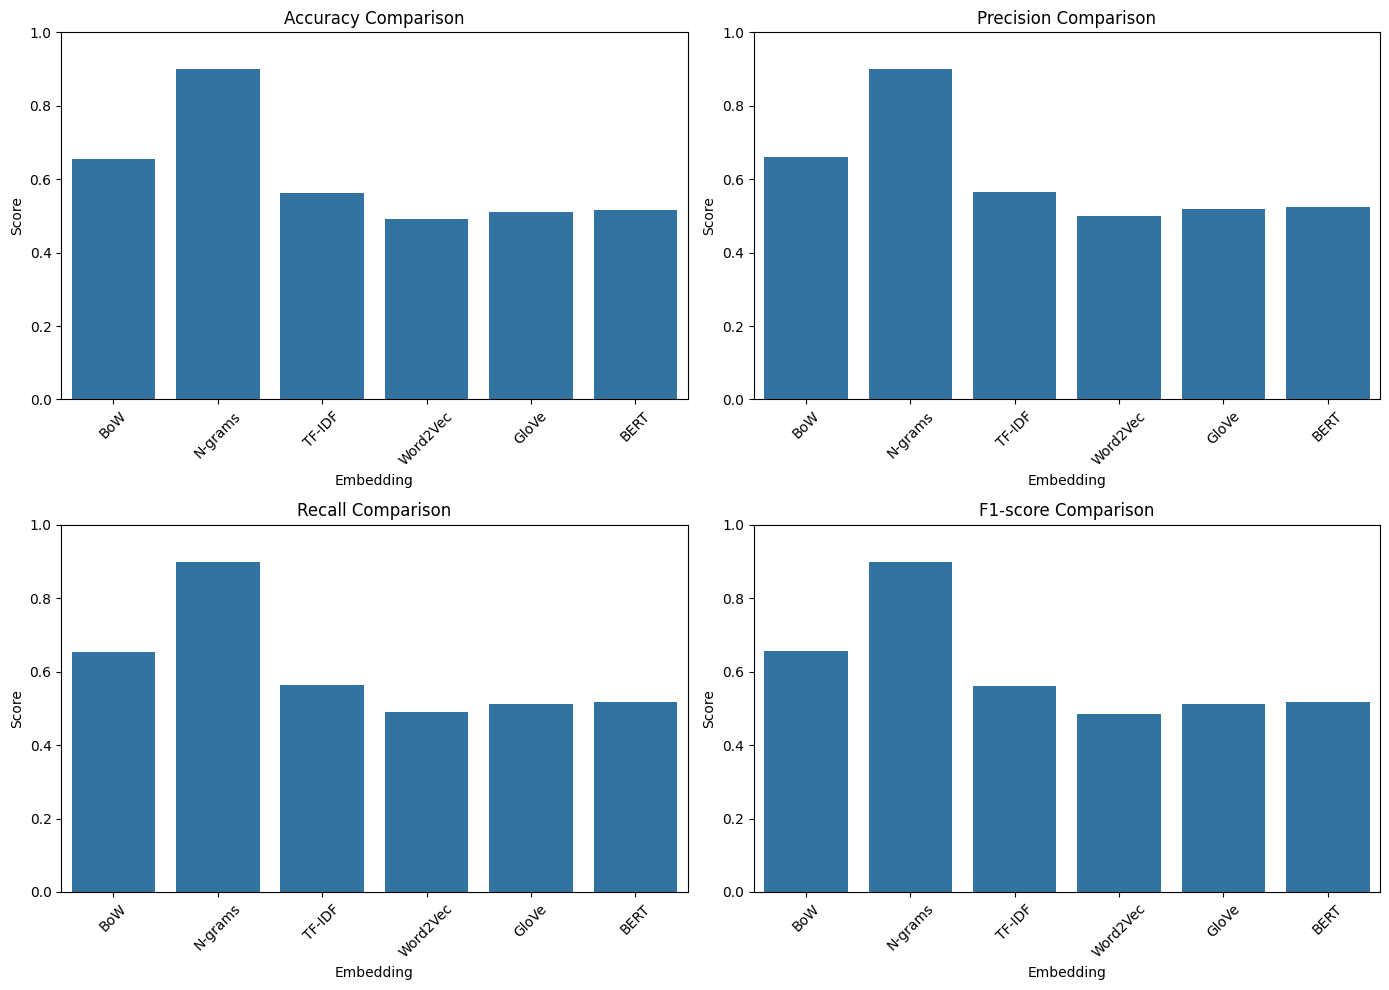

In [34]:
# preparing data in long format for easier plotting
metrics_melted = comparison.melt(
    id_vars="Embedding",
    value_vars=["Accuracy", "Precision", "Recall", "F1-score"],
    var_name="Metric",
    value_name="Score"
)

# plotting all metrics in a single figure with subplots
plt.figure(figsize=(14,10))

metrics_list = ["Accuracy", "Precision", "Recall", "F1-score"]

for i, metric in enumerate(metrics_list, 1):
   plt.subplot(2, 2, i)
   sns.barplot(data=metrics_melted[metrics_melted["Metric"] == metric],
   x="Embedding", y="Score")
   plt.title(f"{metric} Comparison")
   plt.xticks(rotation=45)
   plt.ylim(0,1)

plt.tight_layout()
plt.show()


## **Conclusion**
- TF-IDF and N-gram–based embeddings delivered the strongest overall performance, showing that traditional statistical text representations remain highly effective for structured news articles.

- BERT and other deep learning embeddings performed well but did not significantly outperform TF-IDF due to the moderate dataset size and the relatively formal, topic-consistent writing style of BBC news articles.

- Word2Vec and GloVe captured semantic meaning but were less effective for distinguishing closely related categories such as business vs politics or tech vs business.

- Classical machine learning models (e.g., Logistic Regression, SVM) often generalized better than deep neural models because the dataset is not large enough to fully leverage deep contextual embeddings.

- The project demonstrated that for clean, well-structured, topic-based datasets like BBC News, TF-IDF combined with linear classifiers provides a strong, reliable baseline.

- Macro F1-score was the most useful evaluation metric since it ensures fair assessment across all five news categories, preventing dominant classes (like sport or politics) from overshadowing others.